# We'll follow these steps:

 1.Explore the Example Data of Cats and Dogs
 
 2.Build and Train a Neural Network to recognize the difference between the two
 
 3.Evaluate the Training and Validation accuracy


# Explore the Example Data

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-05-26 11:11:12--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.213.16, 2a00:1450:4009:816::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.213.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   303KB/s    in 3m 11s  

2020-05-26 11:14:24 (351 KB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



The following code will import the os library giving us access to the file system and zipfile library to unzip the data

In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/home/howard/Pictures/tensorflow/classifying_cats_v_dogs/')
zip_ref.close()

Let's define each of these directories:

In [4]:
base_dir = '/home/howard/Pictures/tensorflow/classifying_cats_v_dogs/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

#directories with our training cats/dogs pictures
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

#directories with our validation cats/dogs pictures
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

Now, let's see what the filenames look like in the cats and dogs train directories (file naming conventions are the same in the validation directory):

In [5]:
train_cats_fname = os.listdir(train_cats_dir)
train_dogs_fname = os.listdir(train_dogs_dir)

print(train_cats_fname[:10])
print(train_dogs_fname[:10])

['cat.522.jpg', 'cat.361.jpg', 'cat.18.jpg', 'cat.138.jpg', 'cat.751.jpg', 'cat.669.jpg', 'cat.698.jpg', 'cat.633.jpg', 'cat.519.jpg', 'cat.877.jpg']
['dog.984.jpg', 'dog.251.jpg', 'dog.126.jpg', 'dog.805.jpg', 'dog.431.jpg', 'dog.170.jpg', 'dog.991.jpg', 'dog.666.jpg', 'dog.400.jpg', 'dog.819.jpg']


Let's find out the total number of cat and dog images in the train and validation directories:

In [7]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500


For both cats and dogs, we have 1,000 training images and 500 validation images.

Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters:


In [8]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# parameters for our graph; we will output 4*4  pics
nrows = 4
ncols = 4

pic_index = 0 #index for indexing over image

Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:

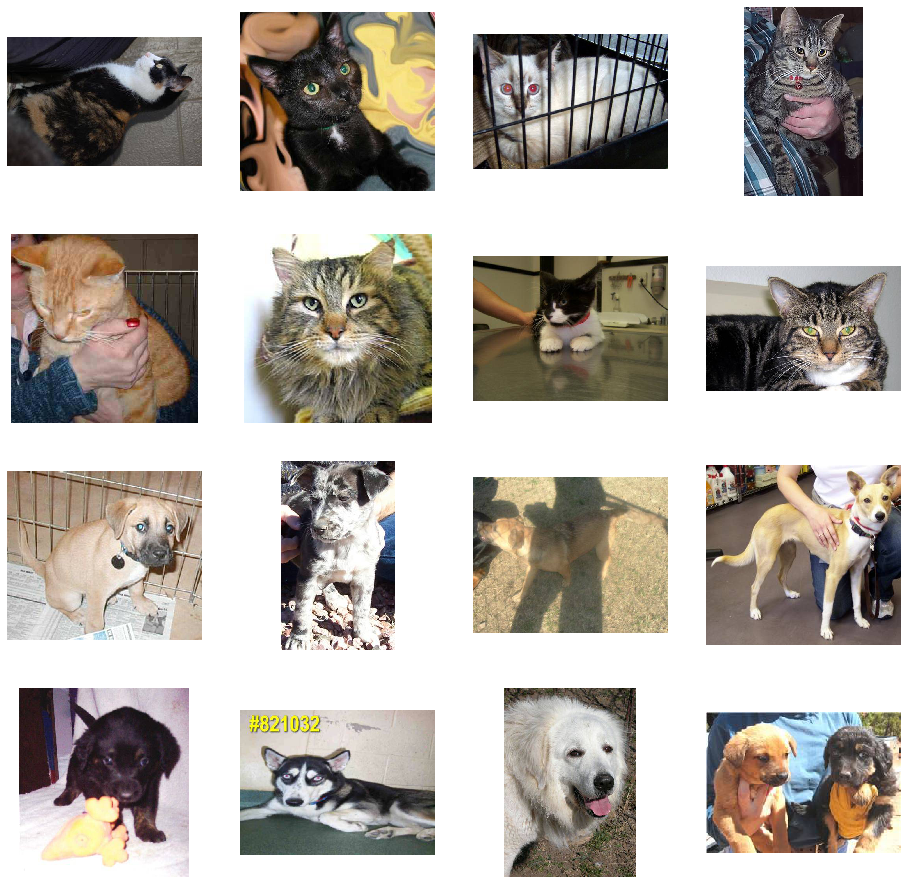

In [12]:
# Set up matplotlib fig and size it fit 4*4 pics
fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cats_fname[pic_index-8:pic_index]
               
               ]

next_dog_pix = [os.path.join(train_dogs_dir,fname)
               for fname in train_dogs_fname[pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    #set up a subplot; subplot indices start at 1
    sp = plt.subplot(nrows,ncols, i+1)
    sp.axis('off') #Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

Ok, now that you have an idea for what your data looks like, the next step is to define the model that will be trained to recognize cats or dogs from these images 

# Building a Small Model from Scratch
Step 1 will be to import tensorflow.

In [15]:
import tensorflow as tf
print(tf.__version__)

2.0.0


step 2 building a model

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512,activation='relu'),
     # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               3

In [21]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(lr=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy']
             )

# Data Preprocessing
Let's set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit, evaluate_generator, and predict_generator.

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   target_size=(150,150)
                                                   )

# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode='binary',
                                                       target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Training

Let's train on all 2,000 images available, for 15 epochs, and validate on all 1,000 test images. (This may take a few minutes to run.)

Do note the values per epoch.

In [23]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch = 100,
                    epochs = 15,
                    validation_steps=50,
                    verbose=2
                   )

Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 - 85s - loss: 0.8548 - accuracy: 0.5820 - val_loss: 0.8823 - val_accuracy: 0.5230
Epoch 2/15
100/100 - 93s - loss: 0.6109 - accuracy: 0.6850 - val_loss: 0.6246 - val_accuracy: 0.6590
Epoch 3/15
100/100 - 93s - loss: 0.5046 - accuracy: 0.7610 - val_loss: 0.6169 - val_accuracy: 0.6890
Epoch 4/15
100/100 - 124s - loss: 0.3770 - accuracy: 0.8285 - val_loss: 0.7043 - val_accuracy: 0.6820
Epoch 5/15
100/100 - 121s - loss: 0.2657 - accuracy: 0.8875 - val_loss: 0.9059 - val_accuracy: 0.6800
Epoch 6/15
100/100 - 100s - loss: 0.1573 - accuracy: 0.9400 - val_loss: 1.0132 - val_accuracy: 0.6920
Epoch 7/15
100/100 - 95s - loss: 0.1156 - accuracy: 0.9540 - val_loss: 1.1645 - val_accuracy: 0.6730
Epoch 8/15
100/100 - 95s - loss: 0.0788 - accuracy: 0.9750 - val_loss: 1.2396 - val_accuracy: 0.6780
Epoch 9/15
100/100 - 97s - loss: 0.0649 - accuracy: 0.9785 - val_loss: 1.7528 - val_accuracy: 0.6790
Epoch 10/15
100/100 - 106s - loss: 0.0689 - a

# Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random cat or dog image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/home/howard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


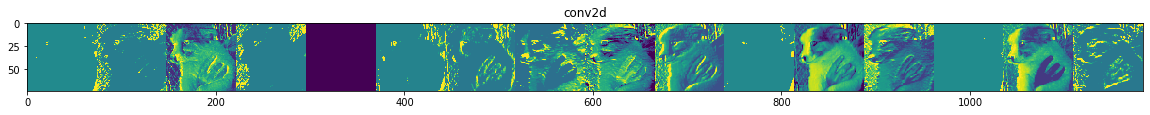

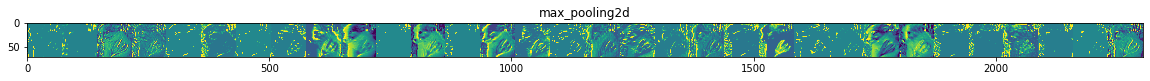

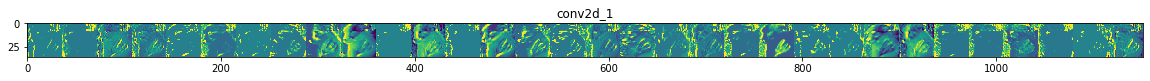

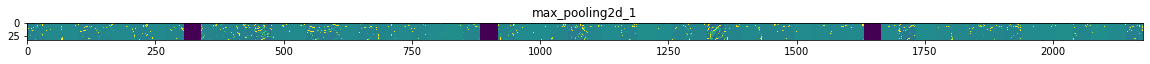

In [26]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_fname]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_fname]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

# Evaluating Accuracy and Loss for the Model

Let's plot the training/validation accuracy and loss as collected during training:

Text(0.5, 1.0, 'Training and validation loss')

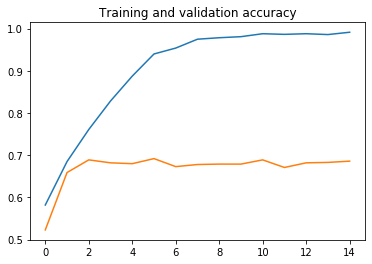

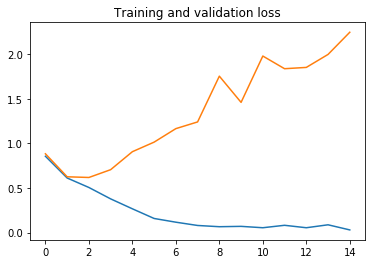

In [27]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

As you can see, we are overfitting like it's getting out of fashion. Our training accuracy (in blue) gets close to 100% (!) while our validation accuracy (in green) stalls as 70%. Our validation loss reaches its minimum after only five epochs.